In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [28]:
# Our dataset and targets
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

In [29]:
Y

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]

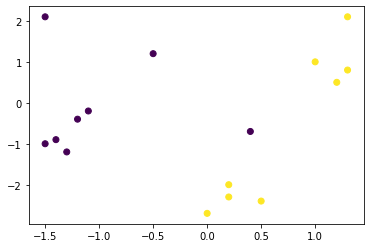

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

<Figure size 432x288 with 0 Axes>

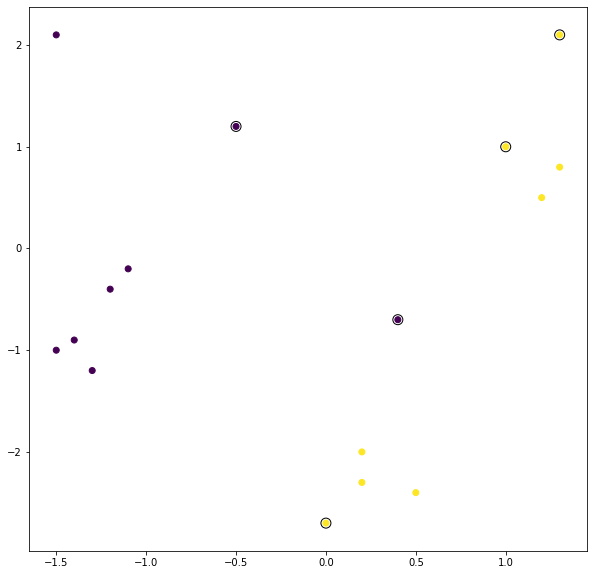

In [31]:
classifier = svm.SVC(kernel="linear")
classifier.fit(X, Y)
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],facecolors='none',edgecolor = "black",zorder = 10 , s =100)
plt.scatter(X[:,0], X[:,1],c=Y)
plt.show()

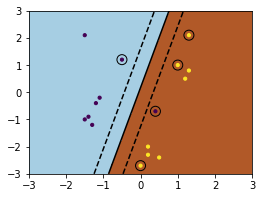

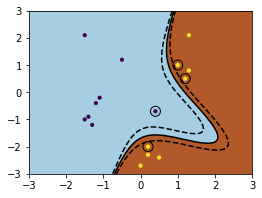

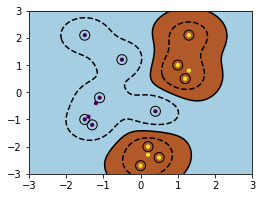

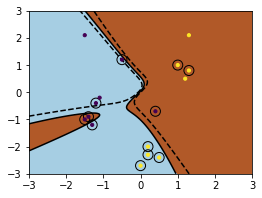

In [37]:
kernls = ["linear","poly","rbf","sigmoid"]
fignum = 1
for kernel in kernls:
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    classifier = svm.SVC(kernel = kernel, gamma = 2, degree = 3)
    classifier.fit(X,Y)
    
    plt.scatter(classifier.support_vectors_[:,0],classifier.support_vectors_[:,1],facecolor = "none", edgecolor = "k"
               ,s = 100,zorder = 10)
    plt.scatter(X[:,0],X[:,1],c = Y
               ,s = 10, zorder = 10)
    
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = classifier.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = np.reshape(Z,YY.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, levels = [-0.5 , 0 , 0.5], colors = ["k","k","k"], linestyles = ["--","-","--"])
    plt.figure(fignum, figsize=(4, 3))
    fignum = fignum + 1
plt.show()

In [37]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [40]:
def my_kernel(X, Y):
    return (1 + np.dot(X, Y.T))**3

In [41]:
classifier = svm.SVC(kernel=my_kernel)
classifier.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function my_kernel at 0x000001D102B11048>, max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

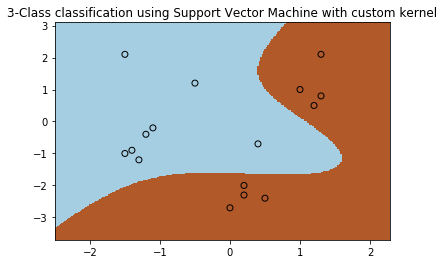

In [42]:
h = .02 
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()